In [2]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from pymc3 import *
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/cars.csv"

In [3]:
data_raw = read_csv(url)
data_raw.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [4]:
#drop columns that are not important to us
columns = ['Unnamed: 5', 'TYPE', '(g/km)', 'RATING', 'TIME (h)']
data = data_raw.drop(columns, axis = 1)
data.skew()

YEAR                -0.572928
(kW)                 0.939392
CITY (kWh/100 km)    0.201837
HWY (kWh/100 km)    -0.493752
COMB (kWh/100 km)    0.145207
CITY (Le/100 km)     0.249986
HWY (Le/100 km)     -0.455123
COMB (Le/100 km)     0.061787
(km)                 0.394793
dtype: float64

# Bayesian Linear regression
This notebook will present Bayesian Linear regression

In [5]:
##### change here if you are curious about different data#########################
y_col = 'COMB (kWh/100 km)'; y= np.array(data[y_col])
x_col = 'CITY (kWh/100 km)' ; x = np.array(data[x_col])
##############################################################

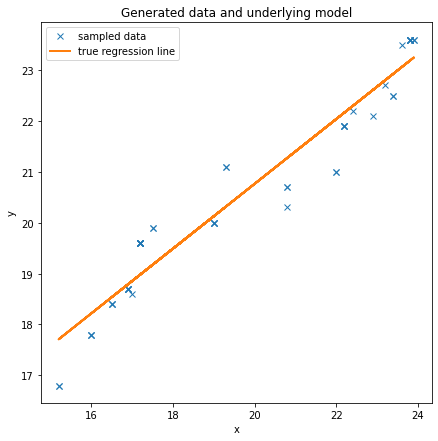

In [6]:
#got the values from previous notebook
true_regression_line = 8.0324 +  0.6366 * x
# add noise
y_new= true_regression_line
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept, sigma]
Sampling 4 chains, 0 divergences: 100%|██████████| 14000/14000 [00:13<00:00, 1049.93draws/s]
The acceptance probability does not match the target. It is 0.8933608619423116, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.89095923318631, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8956112842542349, but should be close to 0.8. Try to increase the number of tuning steps.


<MultiTrace: 4 chains, 3000 iterations, 4 variables>


<Figure size 504x504 with 0 Axes>

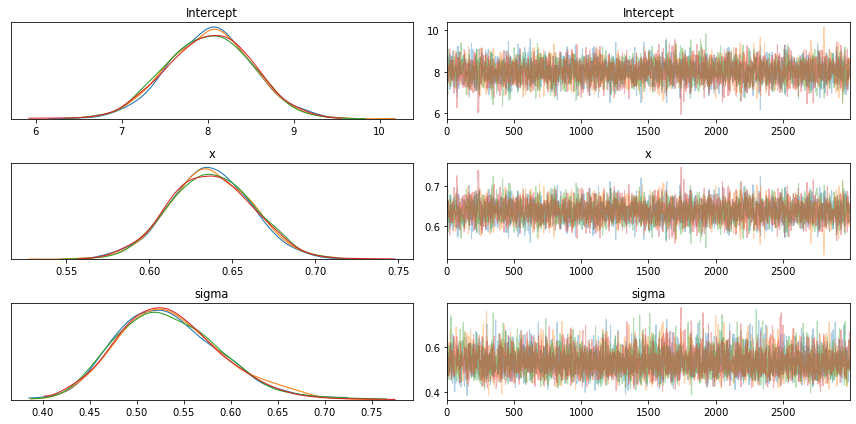

In [41]:
with Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=100, testval=1.0)
    intercept = Normal("Intercept", sigma=20)
    x_coeff = Normal("x", sigma=20)
    mu = intercept + x_coeff * x
    # Define likelihood
    likelihood = Normal("y", mu=mu, sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=4)  # draw 3000 posterior samples using NUTS sampling
    print(trace)
plt.figure(figsize=(7, 7))
traceplot(trace)
plt.tight_layout()

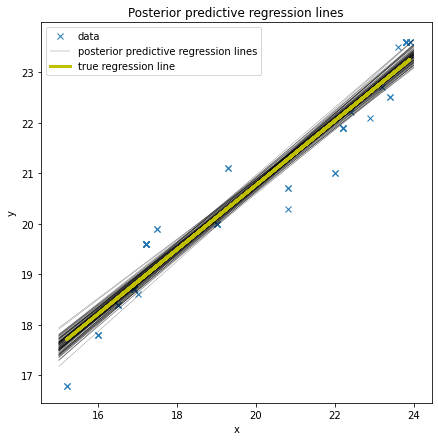

In [42]:
plt.figure(figsize=(7, 7))

plt.plot(x, y,'x', label = 'data')
plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines", eval=np.linspace(15, 24, 10))
plt.plot(x, true_regression_line, label="true regression line", lw=3, c="y")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");

# Conclusion

We see a nice fit on our data. If the reader wishes to try with another columns, please do try :) 